<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v2.0.0demos1?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fexport_SVG_HTML.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/export_SVG_HTML.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

In [1]:
from pandas import DataFrame
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [2]:
# Generate random data.
np.random.seed(123)
data = DataFrame(dict(
    cond=np.repeat(['A','B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(.8, 1, 200)))
))

# Create plot and store it variable 'p'. 
p = ggplot(data, aes(x='rating')) + geom_histogram(binwidth=.5, colour="black", fill="white")

# Find the mean of each group and add a layer of vertical lines marking the means.
cdat = data.groupby(['cond'], as_index=False).mean()
p += geom_vline(data=cdat, mapping=aes(xintercept='rating'), linetype="dashed", size=1, colour="red")

# Group by `cond` and show separately.
p += facet_grid(None, 'cond') + ggsize(500, 250)

### Export SVG to file

In [3]:
ggsave(p, "hist.svg")

'/Users/Igor/Work_misc/jupyter/lets-plot/examples/jupyter-notebooks/lets-plot-images/hist.svg'

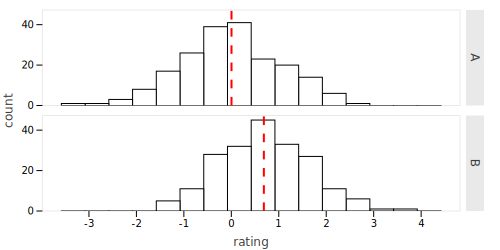

In [4]:
# Load and display saved SVG
from IPython.display import SVG

display(SVG(filename="lets-plot-images/hist.svg"))

### Export HTML to file

In [5]:
ggsave(p, "hist.html")

'/Users/Igor/Work_misc/jupyter/lets-plot/examples/jupyter-notebooks/lets-plot-images/hist.html'

In [6]:
# Load and display saved HTML
from IPython.display import HTML

display(HTML(filename="lets-plot-images/hist.html"))

### Export `iframe` to file

Use `iframe=True` option to wrap plot HTML into `iframe` fitting the plot size.

In [7]:
#export_html(p, "hist_iframe.html", iframe=True)
fname = ggsave(p, "hist_iframe.html")
display(HTML(filename=fname))